# 注意

Kerasでは正規化しないとまったく学習が進まない．

In [84]:
import tensorflow as tf
import numpy as np
import keras.backend as K
from keras.layers import Input, Activation, BatchNormalization, Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets.mnist import load_data
from keras.models import Model
from keras.utils import np_utils

In [85]:
def Cnn(input_size, class_num):
    X_input = Input(input_size)
    
    X = Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), name="conv0")(X_input)
    X = BatchNormalization(axis=3)(X)
    X = Activation("relu")(X)
    X= MaxPool2D(pool_size=(2, 2), strides=(1,1))(X)
    
    X = Dropout(rate=0.2)
    X = Conv2D(filters =64, kernel_size=(5,5), strides=(1,1), name="conv1")(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation("relu")(X)
    X = MaxPool2D(pool_size=(3,3), strides=(1,1))(X)
    
    X = Flatten()(X)
    X = Dense(units=class_num, activation="softmax")(X)
    
    model = Model(inputs=X_input, outputs=X, name="Cnn")
    
    return model

In [86]:
# load data
train,test = load_data()
train_X, train_Y = train
test_X, test_Y = test
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], train_X.shape[2], 1))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], test_X.shape[2], 1))
n_labels = np.unique(train_Y)

# convert into one-hot vector
train_Y = np_utils.to_categorical(train_Y)
test_Y = np_utils.to_categorical(test_Y)

# normalization
train_X = train_X.astype("float32")
train_X /= 255.
test_X = test_X.astype("float32")
test_X /= 255.

In [87]:
input_dim = train_X.shape[1:]
model = Cnn(input_dim, len(n_labels))

ValueError: Layer conv1 was called with an input that isn't a symbolic tensor. Received type: <class 'keras.layers.core.Dropout'>. Full input: [<keras.layers.core.Dropout object at 0xb236b95f8>]. All inputs to the layer should be tensors.

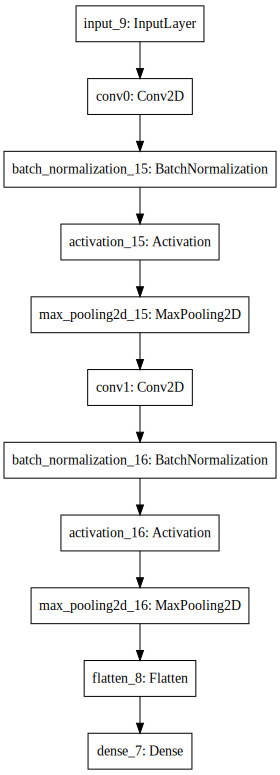

In [88]:
# show the architecture
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [89]:
model.compile(optimizer="adam", loss="categorical_crossentropy",metrics=["accuracy"])

In [91]:
model.fit(batch_size=100, epochs=1, x=train_X, y=train_Y)

Epoch 1/1
60000/60000 [==============================] - 508s 8ms/step - loss: 6.5463 - acc: 0.5861

In [92]:
model.predict(test_X)

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 2.2055849e-15, 1.0000000e+00, ..., 0.0000000e+00,
        3.3978401e-24, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 4.4361235e-29, ..., 8.0834048e-30,
        1.2032809e-28, 0.0000000e+00],
       ...,
       [0.0000000e+00, 3.1448164e-38, 0.0000000e+00, ..., 9.2559143e-28,
        1.0894921e-24, 0.0000000e+00],
       [0.0000000e+00, 4.0979853e-38, 5.7080470e-33, ..., 0.0000000e+00,
        3.6040646e-08, 0.0000000e+00],
       [3.8026893e-33, 2.8046881e-32, 2.3093760e-06, ..., 1.3808772e-34,
        9.7260155e-08, 0.0000000e+00]], dtype=float32)